<a href="https://colab.research.google.com/github/cdevrywhr/Simple-KMeans/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("tidyverse")
install.packages("factoextra")
install.packages("cluster")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(factoextra)
library(cluster)

In [ ]:
df <- USArrests

In [ ]:
sum(is.na(df))

[1] 0

In [ ]:
head(df)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [ ]:
df <- na.omit(df)

In [ ]:
sum(is.na(df))

[1] 0

In [ ]:
df <- scale(df)

In [ ]:
head(df)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


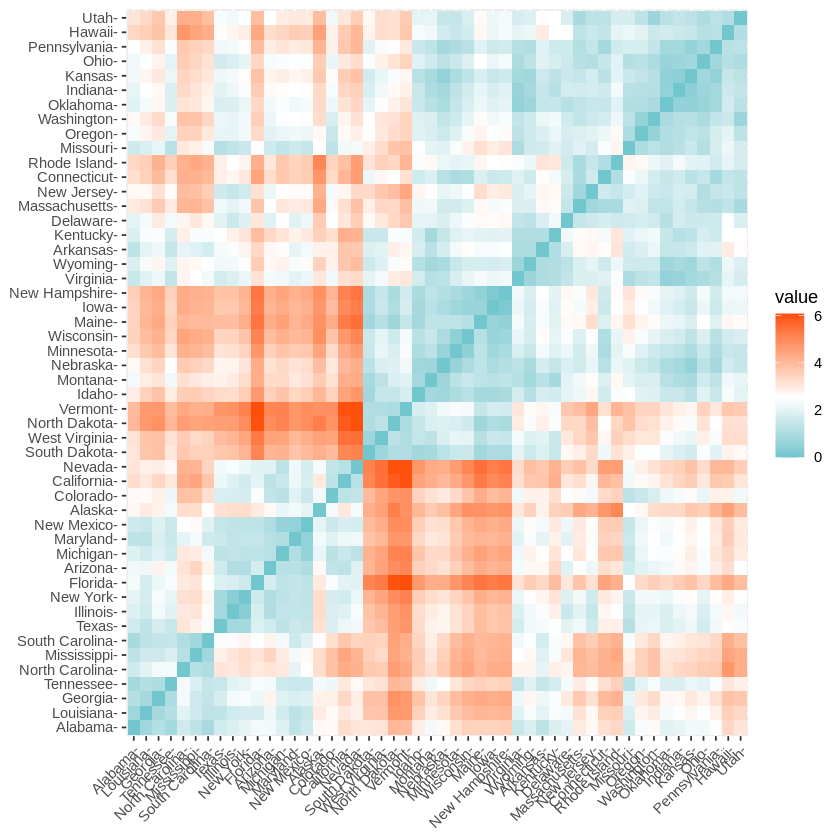

In [ ]:
distance <- get_dist(df)
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))

**Menentukan centers yg optimal**

**ELBOW PLOT**

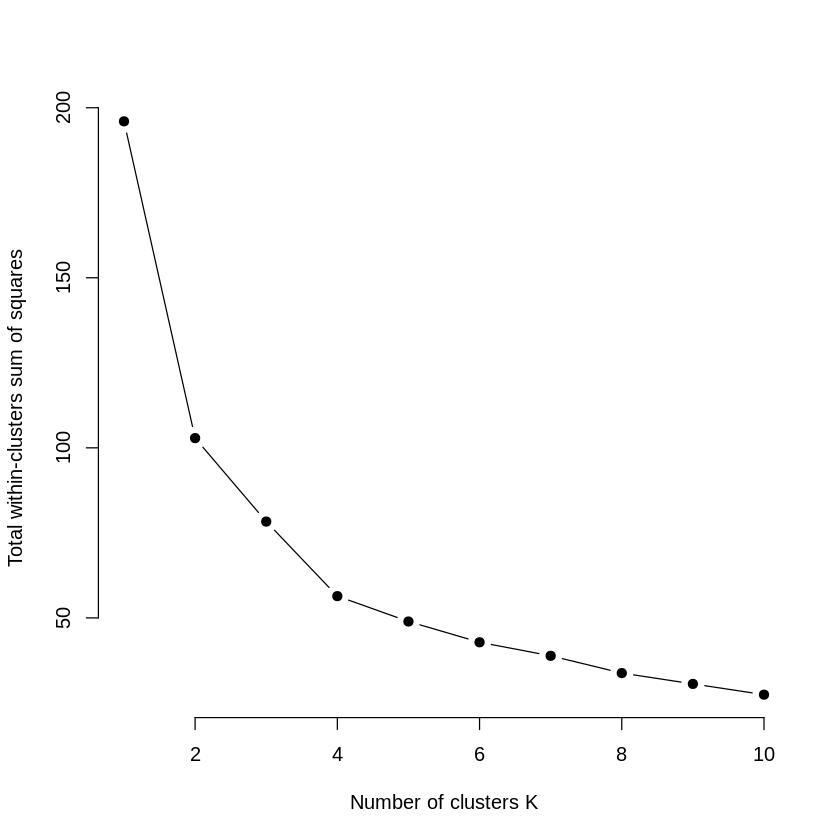

In [ ]:
set.seed(123)

# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(df, k, nstart = 10 )$tot.withinss
}

# Compute and plot wss for k = 1 to k = 15
k.values <- 1:10

# extract wss for 2-15 clusters
wss_values <- map_dbl(k.values, wss)

plot(k.values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

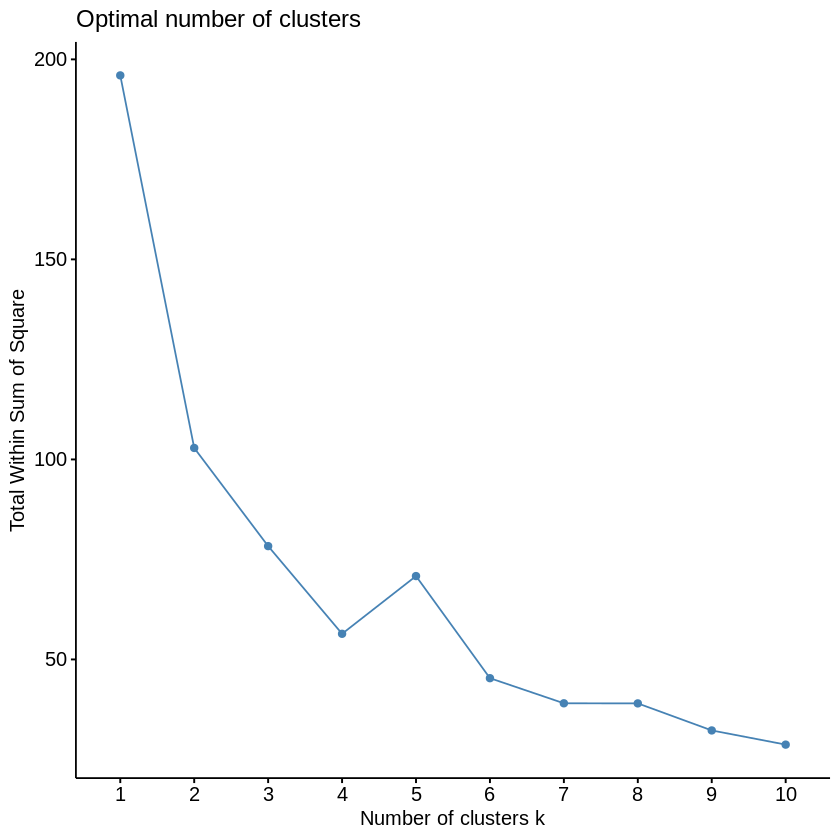

In [ ]:
set.seed(123)
fviz_nbclust(df,kmeans,method="wss")

**AVERAGE SILHOUETTE METHOD**

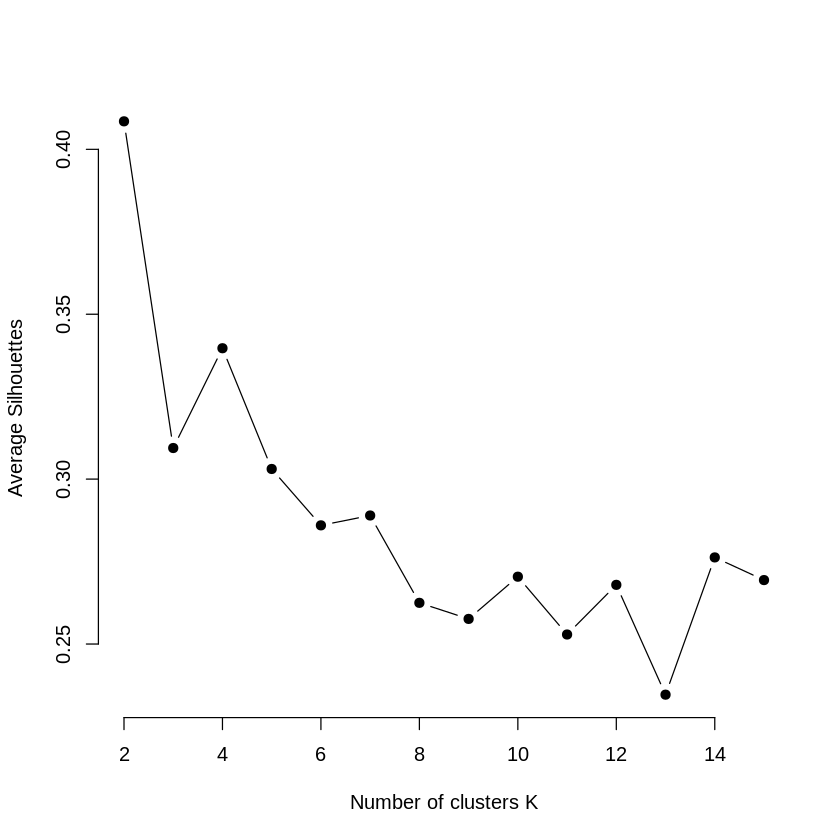

In [ ]:
# function to compute average silhouette for k clusters
avg_sil <- function(k) {
  km.res <- kmeans(df, centers = k, nstart = 25)
  ss <- silhouette(km.res$cluster, dist(df))
  mean(ss[, 3])
}

# Compute and plot wss for k = 2 to k = 15
k.values <- 2:15

# extract avg silhouette for 2-15 clusters
avg_sil_values <- map_dbl(k.values, avg_sil)

plot(k.values, avg_sil_values,
       type = "b", pch = 19, frame = FALSE, 
       xlab = "Number of clusters K",
       ylab = "Average Silhouettes")

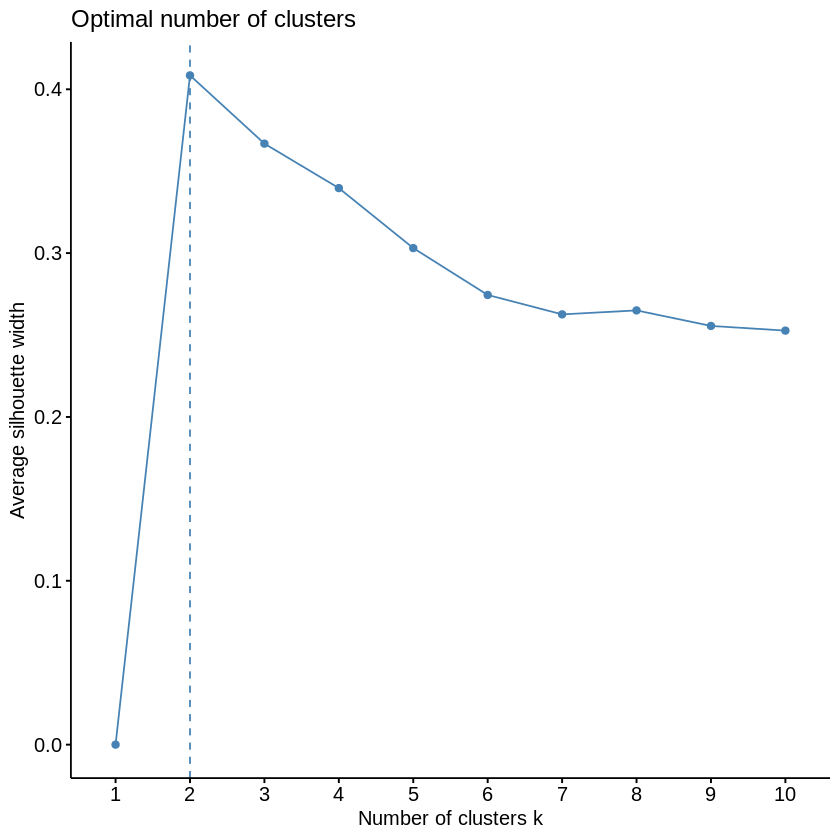

In [ ]:
fviz_nbclust(df, kmeans, method = "silhouette")

**Gap Statistic Method**

In [ ]:
# compute gap statistic
set.seed(123)
gap_stat <- clusGap(df, FUN = kmeans, nstart = 25,
                    K.max = 10, B = 50)
# Print the result
print(gap_stat, method = "firstmax")

Clustering Gap statistic ["clusGap"] from call:
clusGap(x = df, FUNcluster = kmeans, K.max = 10, B = 50, nstart = 25)
B=50 simulated reference sets, k = 1..10; spaceH0="scaledPCA"
 --> Number of clusters (method 'firstmax'): 4
          logW   E.logW       gap     SE.sim
 [1,] 3.458369 3.640154 0.1817845 0.04422857
 [2,] 3.135112 3.372283 0.2371717 0.03559601
 [3,] 2.977727 3.233771 0.2560446 0.03749193
 [4,] 2.826221 3.119172 0.2929511 0.04067348
 [5,] 2.738868 3.019965 0.2810969 0.04185469
 [6,] 2.666967 2.930002 0.2630347 0.04105040
 [7,] 2.609895 2.852152 0.2422572 0.04184725
 [8,] 2.539156 2.778562 0.2394054 0.04292750
 [9,] 2.468162 2.711752 0.2435901 0.04344197
[10,] 2.407265 2.647595 0.2403307 0.04548446


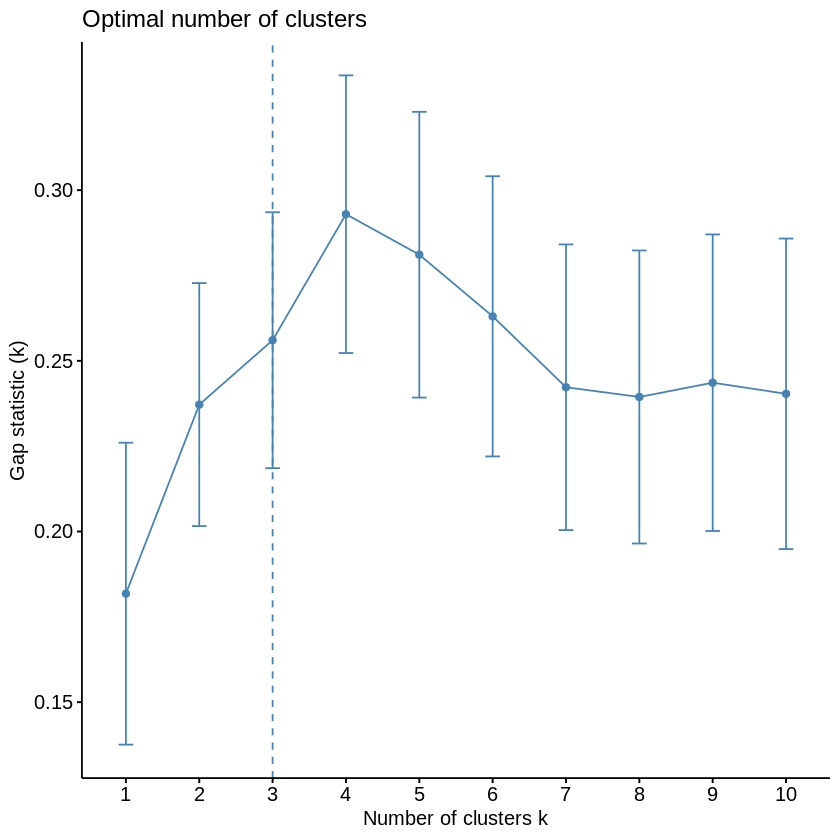

In [ ]:
fviz_gap_stat(gap_stat)

In [ ]:
set.seed(123)
km <- kmeans(df, centers = 4, nstart = 25)
km

K-means clustering with 4 clusters of sizes 8, 13, 16, 13

Cluster means:
      Murder    Assault   UrbanPop        Rape
1  1.4118898  0.8743346 -0.8145211  0.01927104
2 -0.9615407 -1.1066010 -0.9301069 -0.96676331
3 -0.4894375 -0.3826001  0.5758298 -0.26165379
4  0.6950701  1.0394414  0.7226370  1.27693964

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             1              4              4              1              4 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             4              3              3              4              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              2              4              3              2 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              2              1              2              4 
 Massachusetts       Michigan      Minnesota    Mississippi    

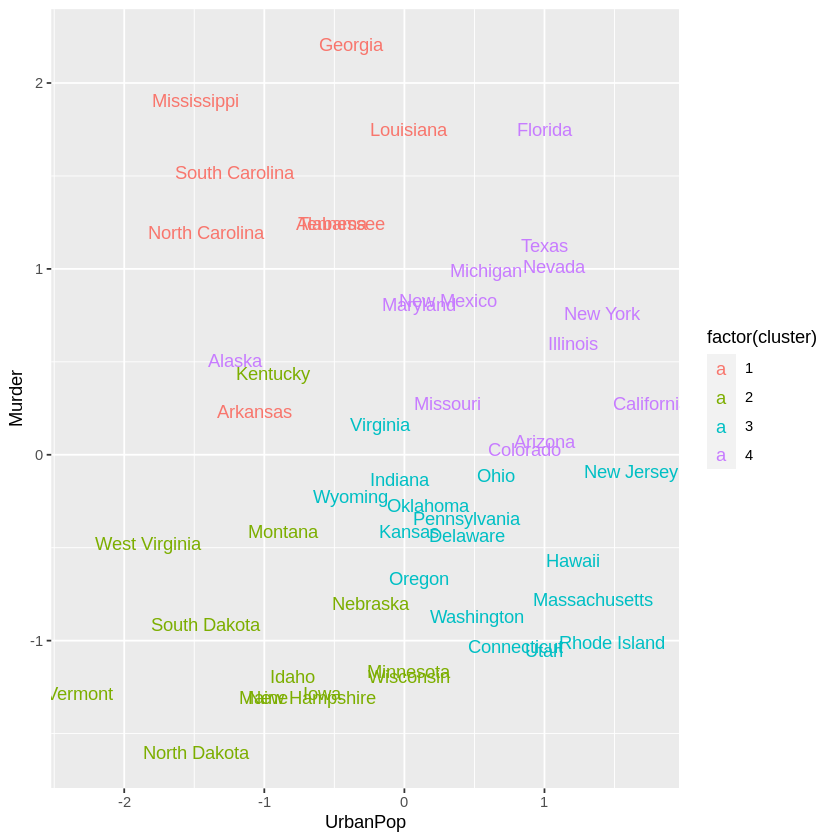

In [ ]:
df %>%
  as_tibble() %>%
  mutate(cluster = km$cluster,
         state = row.names(USArrests)) %>%
  ggplot(aes(UrbanPop, Murder, color = factor(cluster), label = state)) +
  geom_text()

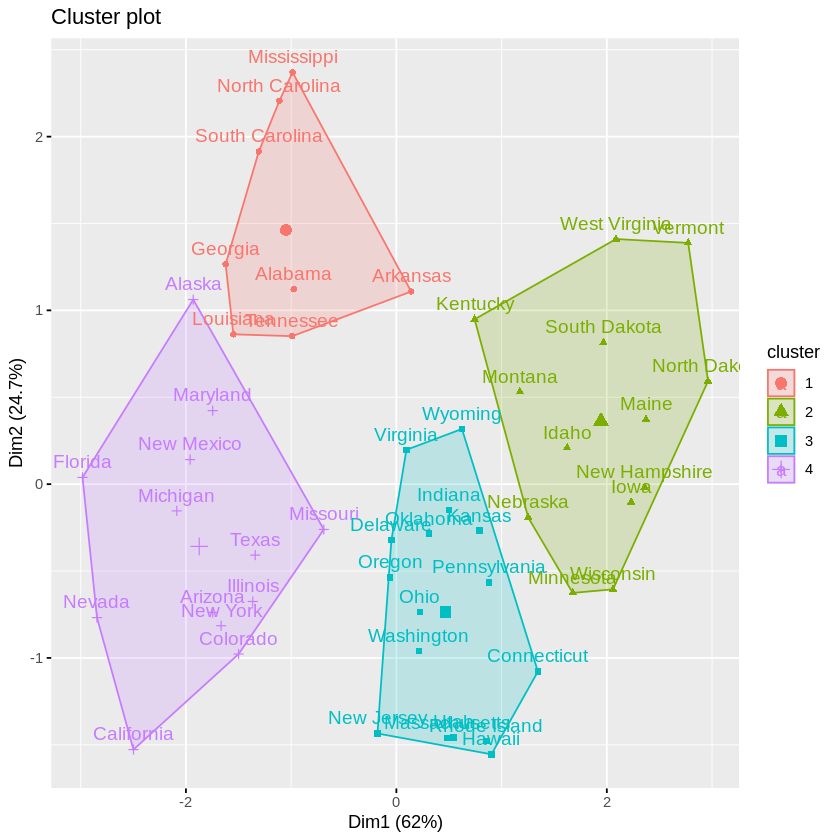

In [ ]:
fviz_cluster(km,data=df)

In [ ]:
USArrests %>%
  mutate(Cluster = km$cluster) %>%
  group_by(Cluster) %>%
  summarise_all("mean")

Cluster,Murder,Assault,UrbanPop,Rape
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,13.93750,243.62500,53.75000,21.41250
2,3.60000,78.53846,52.07692,12.17692
3,5.65625,138.87500,73.87500,18.78125
4,10.81538,257.38462,76.00000,33.19231
